In [30]:
from crem.crem import grow_mol, mutate_mol
from rdkit import Chem
import pandas as pd

import mols2grid

In [26]:
db1 = 'replacements02_sc2'
db2 = 'replacements02_sc2.5'
db3 = 'replacements02_sa2'

In [77]:
crem_db = f'databases/{db2}.db'

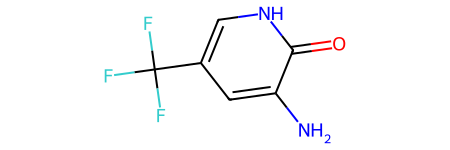

In [78]:
frag_smi = "Nc1cc(c[nH]c1=O)C(F)(F)F"
frag_mol = Chem.MolFromSmiles(frag_smi)
frag_mol

### CReM `grow` method:

In [79]:
out_list = []
grow_list = list(grow_mol(frag_mol, db_name=crem_db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
    
df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])


[00:24:13] WARNING: not removing hydrogen atom with dummy atom neighbors
[00:24:13] WARNING: not removing hydrogen atom with dummy atom neighbors
[00:24:13] WARNING: not removing hydrogen atom with dummy atom neighbors
[00:24:13] WARNING: not removing hydrogen atom with dummy atom neighbors


In [80]:
df

,Idx,SMILES,Input_SMILES
0,0,CNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,O=NNc1cc(C(F)(F)F)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


### CReM `mutate` method

In [81]:
out_list = []
grow_list = list(mutate_mol(frag_mol, db_name=crem_db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])

df2 = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

In [82]:
df2

,Idx,SMILES,Input_SMILES
0,0,FC(F)(F)c1nc2ccc(Br)cc2[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,FC(F)(F)c1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,FC(F)(F)c1[nH]nc2ccccc12,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,FC(F)(F)c1nc2ccccc2[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,Cc1cc(C(F)(F)F)c(C#N)c(=O)[nH]1,Nc1cc(c[nH]c1=O)C(F)(F)F
...,...,...,...
480,480,NC(=S)NN=Cc1ccc(F)cc1,Nc1cc(c[nH]c1=O)C(F)(F)F
481,481,NC(=S)NN=Cc1ccc(Br)cc1F,Nc1cc(c[nH]c1=O)C(F)(F)F
482,482,NC(=S)NN=Cc1cccc(F)c1,Nc1cc(c[nH]c1=O)C(F)(F)F
483,483,Nc1cc(-c2ccccc2)c[nH]c1=O,Nc1cc(c[nH]c1=O)C(F)(F)F


In [83]:
smiles = df['SMILES'].values

In [84]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [85]:
mols2grid.display(mols,
                  size=(400, 250))

MolGridWidget()

In [86]:
frag_smi

'Nc1cc(c[nH]c1=O)C(F)(F)F'

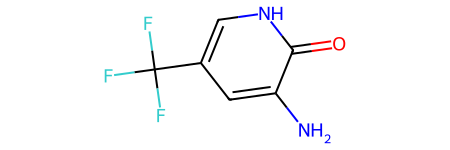

In [87]:
frag_mol

In [91]:
smiles2 = df2['SMILES'].values[:20]

In [92]:
mols2 = [Chem.MolFromSmiles(smile) for smile in smiles2]

In [93]:
mols2grid.display(mols2,
                  size=(400, 250))

MolGridWidget()

In [95]:
for smile in smiles:
    print(smile in df2['SMILES'].values)

False
False


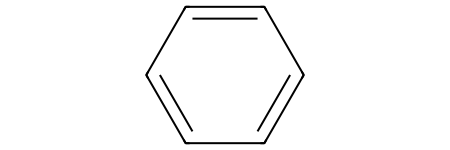

In [65]:
benzene = 'c1ccccc1'
benzene_mol = Chem.MolFromSmiles(benzene)
benzene_mol

In [66]:
out_list = []
grow_list = list(grow_mol(benzene_mol, db_name=crem_db,return_mol=False))

for idx,analog in enumerate(grow_list):
    out_list.append([idx,analog,frag_smi])
    
df = pd.DataFrame(out_list,columns=["Idx","SMILES","Input_SMILES"])

[00:19:28] WARNING: not removing hydrogen atom with dummy atom neighbors


In [67]:
df

,Idx,SMILES,Input_SMILES
0,0,Brc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
1,1,BrCc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
2,2,Cc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
3,3,C=Cc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
4,4,C#Cc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
5,5,CCc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
6,6,Clc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
7,7,ClCc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
8,8,C=Nc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F
9,9,CNc1ccccc1,Nc1cc(c[nH]c1=O)C(F)(F)F


In [63]:
db2_results = df['SMILES'].values

In [68]:
db1_results = df['SMILES'].values

In [55]:
smiles = df['SMILES'].to_list()

In [56]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [57]:
mols2grid.display(mols)

MolGridWidget()